In [1]:
import numpy as np # for mathematical operations
import pandas as pd # for reading csv
%matplotlib inline
import matplotlib.pyplot as plt # for plotting the images
from keras.preprocessing import image # for preprocessing the images

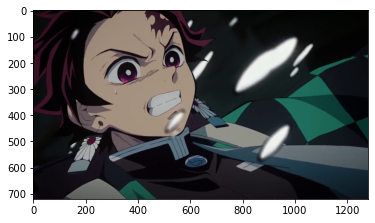

In [2]:
img = plt.imread('frame267.jpg')
plt.imshow(img) # show image

In [9]:
from skimage.transform import resize # for resizing images
img2 = plt.imread('frame266.jpg')
X = [ ]
image = []
img = resize(img, preserve_range=True, output_shape=(224,224)).astype(int)
image.append(img)
img2 = resize(img, preserve_range=True, output_shape=(224,224)).astype(int)
image.append(img2)
X = np.array(image)
X.shape

(2, 224, 224, 3)

In [11]:
# X = X/255.0

from keras.applications.vgg16 import VGG16
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

img_features = vgg_model.predict(X)
img_features.shape

(2, 7, 7, 512)

In [13]:
#plt.imshow(img_features[0])
img_features[0].shape

(7, 7, 512)

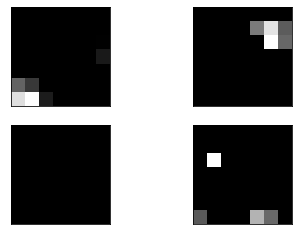

In [14]:
from matplotlib import pyplot
square = 2
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(img_features[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

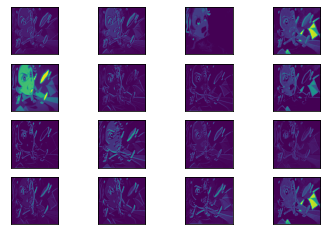

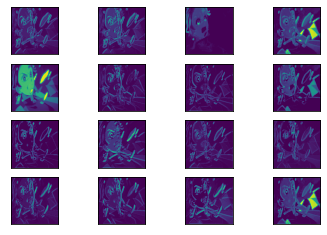

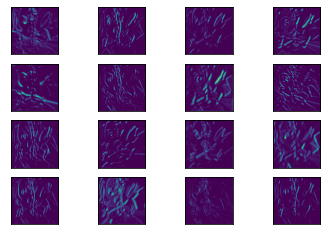

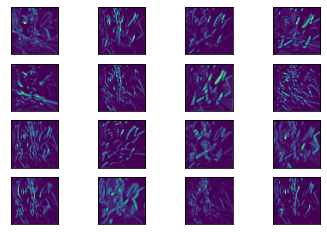

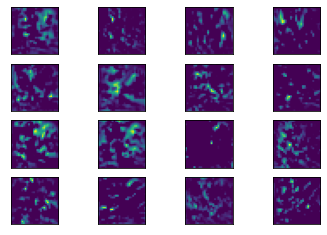

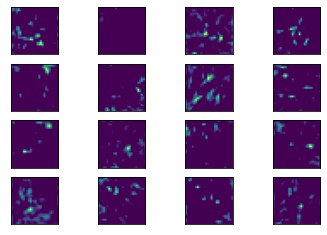

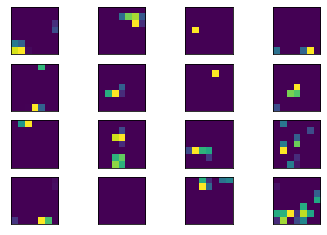

In [53]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 3, 5, 6, 11, 13, 18]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('frame267.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
# img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 4
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1])
            ix += 1
    # show the figure
    pyplot.show()

In [42]:
model.summary()

Model: "functional_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128) 

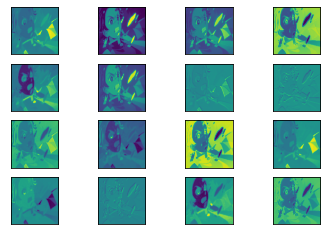

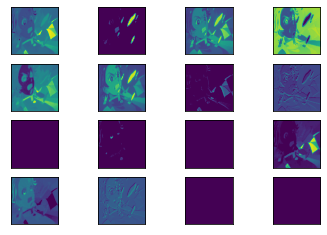

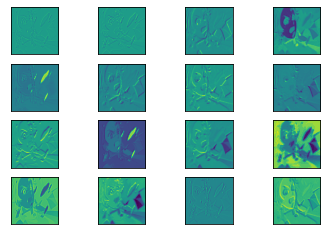

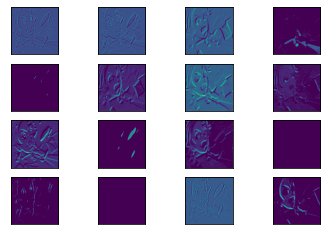

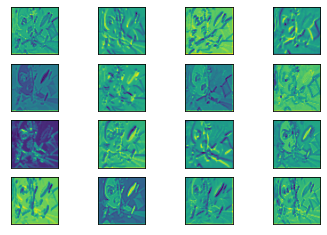

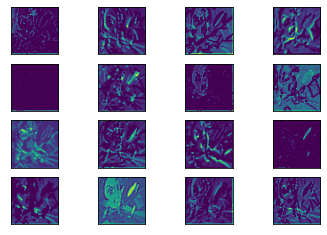

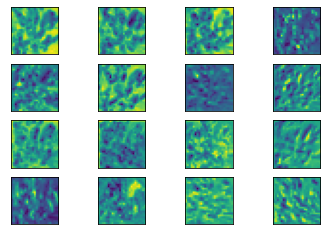

In [56]:
# visualize feature maps output from each block in the vgg model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = InceptionV3()
# redefine model to output right after the first hidden layer
ixs = [2, 3, 5, 6, 11, 13, 18]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('frame267.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
img = img/255.0
# prepare the image (e.g. scale pixel values for the vgg)
# img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 4
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1])
            ix += 1
    # show the figure
    pyplot.show()

In [55]:
model.summary()

Model: "functional_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 299, 299, 3)]     0         
_________________________________________________________________
conv2d_188 (Conv2D)          (None, 149, 149, 32)      864       
_________________________________________________________________
batch_normalization_188 (Bat (None, 149, 149, 32)      96        
_________________________________________________________________
activation_188 (Activation)  (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_189 (Conv2D)          (None, 147, 147, 32)      9216      
_________________________________________________________________
batch_normalization_189 (Bat (None, 147, 147, 32)      96        
_________________________________________________________________
activation_189 (Activation)  (None, 147, 147, 32)    

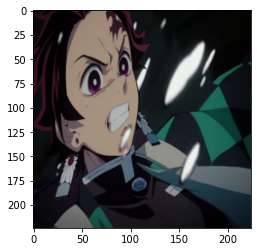

In [50]:
img = plt.imread('frame267.jpg')
img = resize(img, preserve_range=True, output_shape=(224,224)).astype(int)
plt.imshow(img)